In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats
from scipy.interpolate import UnivariateSpline

In [68]:
mpl.rcParams['figure.figsize'] = [10, 6]
mpl.rcParams['legend.fontsize'] = 24
mpl.rcParams['font.family'] = "Helvetica"
mpl.rcParams['mathtext.fontset'] = 'dejavuserif'
mpl.rcParams['font.size'] = 24
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

#sns.set_style('white')
#sns.set_style('ticks')

In [3]:
palette_tab10 = sns.color_palette("tab10", 10)

# Results

In [4]:
# Selecting all snapshots back to z=3, peak star formation happens around z=2
snapshots = [99, 91, 83, 75, 67, 59, 51, 43, 35, 25, 13]
print(snapshots)

[99, 91, 83, 75, 67, 59, 51, 43, 35, 25, 13]


In [5]:
redshifts = np.load('data/redshifts.npy')
redshifts = np.flip(redshifts)[snapshots]
print(redshifts)

[2.22044605e-16 9.94018026e-02 2.14425036e-01 3.47853842e-01
 5.03047523e-01 7.00106354e-01 9.50531352e-01 1.30237846e+00
 1.82268925e+00 3.00813107e+00 6.01075740e+00]


In [6]:
ages = np.load('data/ages.npy')
ages = np.flip(ages)[snapshots]
print(ages)
print(np.diff(ages))

[13.80271833 12.46636383 11.13756151  9.83708686  8.58656951  7.31414105
  6.07331943  4.81591437  3.59298263  2.14538275  0.93171893]
[-1.33635449 -1.32880232 -1.30047466 -1.25051734 -1.27242847 -1.24082162
 -1.25740506 -1.22293174 -1.44759988 -1.21366382]


### Overall Causal Effect of Environment

In [26]:
df_results = pd.read_hdf('results/causal_model_halo_mass/joint_effect_outcome_current.h5', 'snapshots_all')

In [27]:
df_results

outcome
Levels SnapNum treatment Sample          
0      99      -0.243940 0      -0.626314
                         1      -0.611833
                         2      -1.936851
                         3      -0.637054
                         4       -0.59542
...                                   ...
99     13       2.592449 995    -0.013314
                         996     0.066121
                         997     0.133643
                         998     0.121294
                         999     0.068849

[231000 rows x 1 columns]

In [28]:
df_results = df_results.reset_index() 

In [29]:
df_results

,Levels,SnapNum,treatment,Sample,outcome
0,0,99,-0.243940,0,-0.626314
1,0,99,-0.243940,1,-0.611833
2,0,99,-0.243940,2,-1.936851
3,0,99,-0.243940,3,-0.637054
4,0,99,-0.243940,4,-0.59542
...,...,...,...,...,...
230995,99,13,2.592449,995,-0.013314
230996,99,13,2.592449,996,0.066121
230997,99,13,2.592449,997,0.133643
230998,99,13,2.592449,998,0.121294


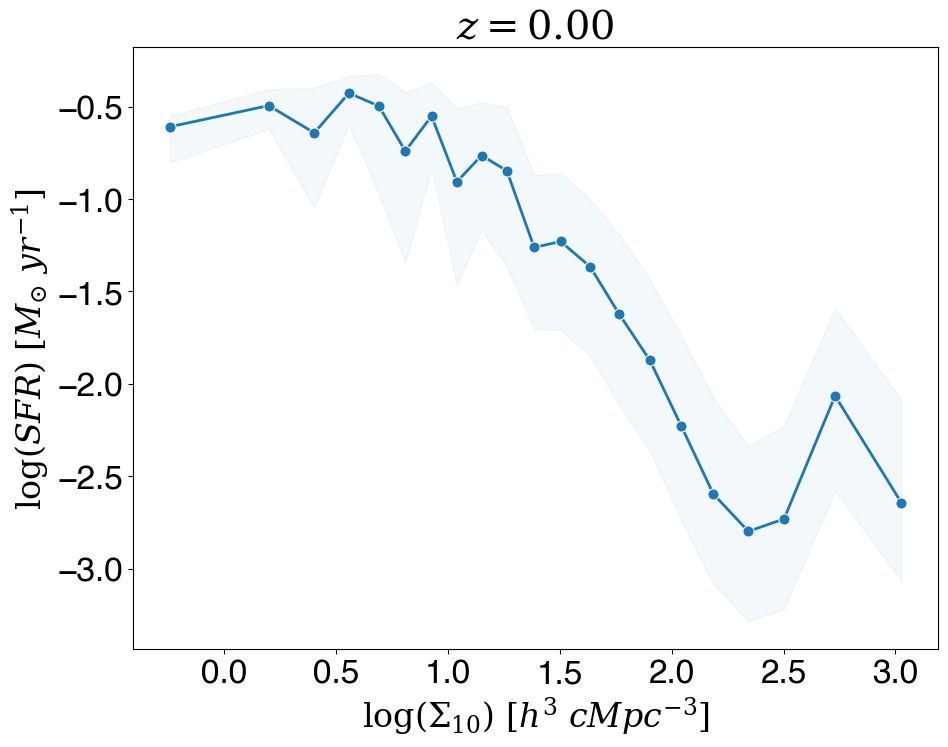

In [17]:
snapshot = 99
sns.lineplot(data=df_results[df_results['SnapNum'] == snapshot], 
             x='treatment', 
             y='outcome', 
             estimator='median', 
             errorbar=('pi', 68), 
             err_style='band',
             err_kws={"alpha": 0.05},
             marker='o',
             markersize=8,
             linewidth=2
            )

plt.title(f'$z = {redshifts[0]:.2f}$')
plt.xlabel(r'$\log(\Sigma_{10}) \ [h^{3} \ cMpc^{-3}]$')
plt.ylabel(r'$\log(SFR) \ [M_{\odot} \ yr^{-1}]$')
plt.tight_layout()
#plt.savefig('plots/nature/cdrc_joint_effect.png', dpi=300, bbox_inches='tight')
#plt.savefig('plots/nature/cdrc_joint_effect.svg', dpi=300, bbox_inches='tight')
plt.show()

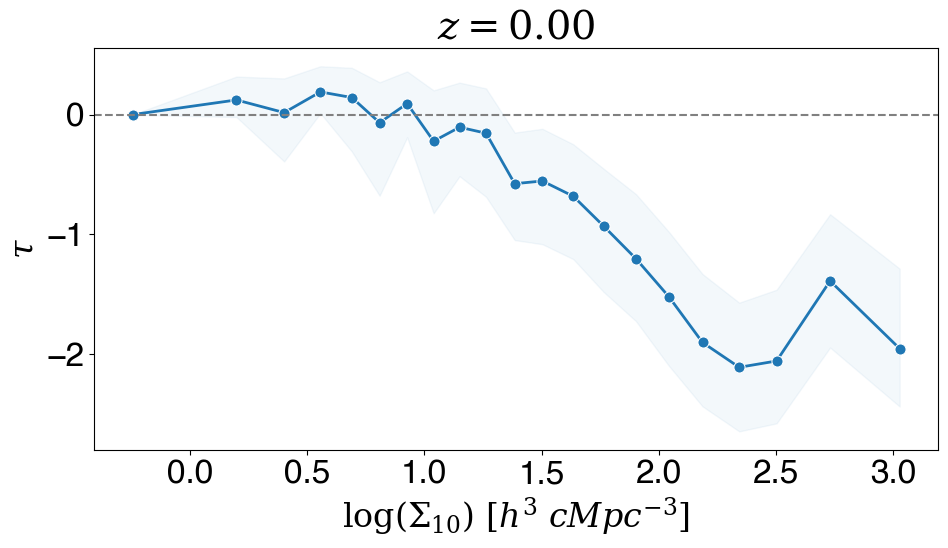

In [25]:
snapshot = 99
sns.lineplot(data=df_results[df_results['SnapNum'] == snapshot],
             x="treatment", 
             y='outcome',
             estimator='median', 
             errorbar=('pi', 68), 
             err_style='band',
             err_kws={"alpha": 0.05},
             marker='o',
             markersize=8,
             linewidth=2,
            )

plt.title(f'$z = {redshifts[0]:.2f}$')
plt.axhline(y=0, color='.5', linestyle='--')

plt.xlabel(r'$\log(\Sigma_{10}) \ [h^{3} \ cMpc^{-3}]$')
#plt.ylabel(r'$\Delta \log(SFR) \ [M_{\odot} \ yr^{-1}]$') # for matching dimensions
plt.ylabel(r'$\tau$')
plt.tight_layout()
#plt.savefig('plots/nature/cdrc_joint_effect_causal_effect.png', dpi=300, bbox_inches='tight')
#plt.savefig('plots/nature/cdrc_joint_effect_causal_effect.svg', dpi=300, bbox_inches='tight')
plt.show()

### Role of Environment over Time

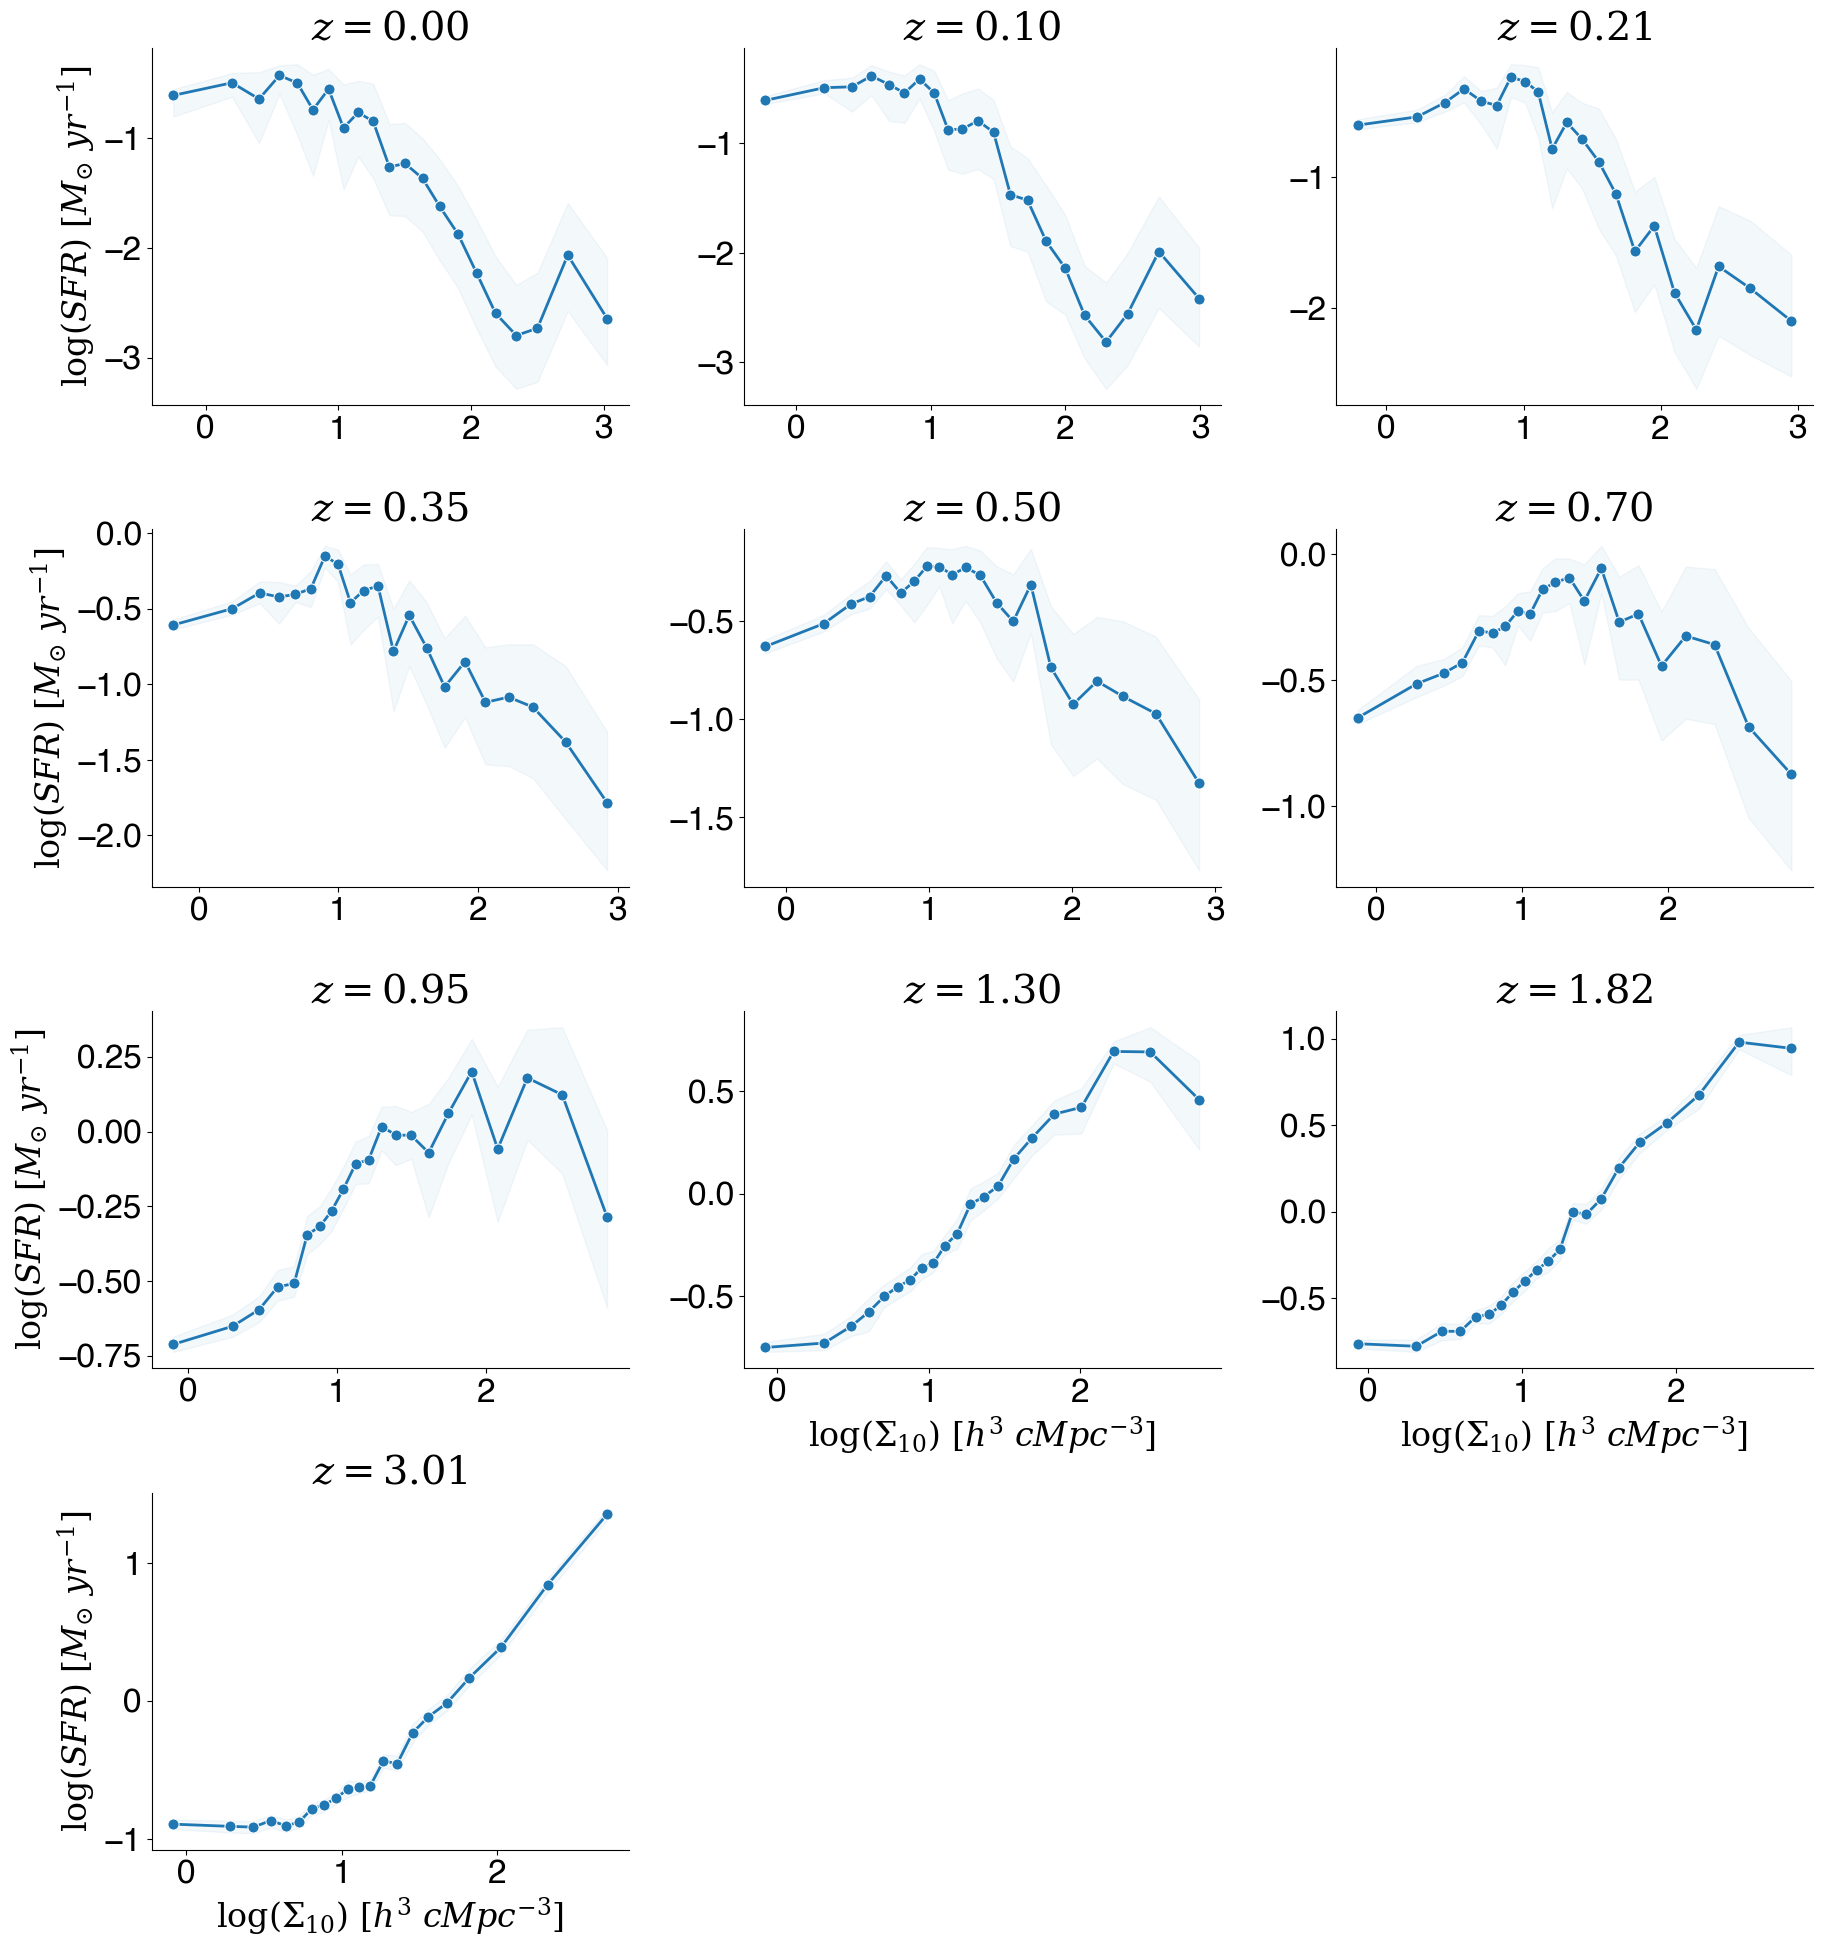

In [30]:
g = sns.FacetGrid(df_results, col="SnapNum", aspect=1.25, height=5, col_wrap=3, col_order=snapshots[:-1], 
                  sharex=False, sharey=False)
g.map_dataframe(sns.lineplot, 
                x="treatment", 
                y='outcome', 
                estimator='median', 
                errorbar=('pi', 68), 
                err_style='band',
                err_kws={"alpha": 0.05},
                marker='o',
                markersize=8,
                linewidth=2
               )

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(f'$z = {redshifts[i]:.2f}$')

g.set_xlabels(r'$\log(\Sigma_{10}) \ [h^{3} \ cMpc^{-3}]$')
g.set_ylabels(r'$\log(SFR) \ [M_{\odot} \ yr^{-1}]$')
g.tight_layout()
#plt.savefig('plots/nature/cdrc_joint_effect_outcome_current.png', dpi=300, bbox_inches='tight')
#plt.savefig('plots/nature/cdrc_joint_effect_outcome_current.svg', dpi=300, bbox_inches='tight')
plt.show()

In [31]:
palette_tab10 = sns.color_palette("tab10", 10)
palette = {'Naïve Model': 'coral', 'Traditional Model (Stellar Mass)': palette_tab10[3], 'Causal Model (Halo Mass)': palette_tab10[0], 'Causal Model (Stellar Mass)': palette_tab10[2]}
#labels = ['No Model', 'Naive Model \n (Stellar Mass)', 'Causal Model \n (Halo Mass)', 'Causal Model \n (Stellar Mass)']
#linestyle = {"ls" : ["-", "-", "-", "-"]}
# orchid

In [70]:
df_results_causal_model_subhalo_mass = pd.read_hdf('results/causal_model_halo_mass/joint_effect_outcome_current.h5', 'snapshots_all')
df_results_causal_model_stellar_mass = pd.read_hdf('results/causal_model_stellar_mass/joint_effect_outcome_current.h5', 'snapshots_all')
df_results_naive_model_stellar_mass = pd.read_hdf('results/traditional_model/joint_effect_outcome_current.h5', 'snapshots_all')
df_results_no_model = pd.read_hdf('results/naive_model/joint_effect_outcome_current.h5', 'snapshots_all')

In [33]:
df_results_causal_model_subhalo_mass = df_results_causal_model_subhalo_mass.reset_index() 
df_results_causal_model_stellar_mass = df_results_causal_model_stellar_mass.reset_index() 
df_results_naive_model_stellar_mass = df_results_naive_model_stellar_mass.reset_index()
df_results_no_model = df_results_no_model.reset_index() 

In [34]:
df_results_causal_model_subhalo_mass['model'] = 'Causal Model (Halo Mass)'
df_results_causal_model_stellar_mass['model'] = 'Causal Model (Stellar Mass)'
df_results_naive_model_stellar_mass['model'] = 'Traditional Model (Stellar Mass)'
df_results_no_model['model'] = 'Naïve Model'

### Causal vs Naive Model

In [35]:
df_results = pd.concat([df_results_causal_model_subhalo_mass, df_results_no_model])

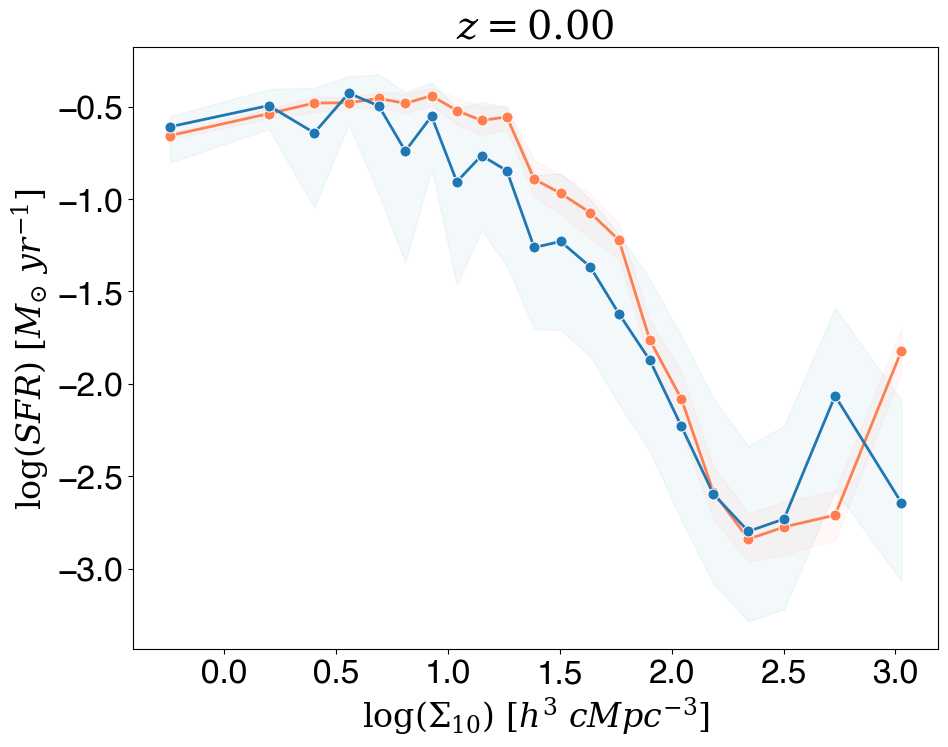

In [38]:
snapshot = 99
sns.lineplot(data=df_results[df_results['SnapNum'] == snapshot],
             x="treatment", 
             y='outcome',
             hue='model',
             hue_order=["Naïve Model", "Causal Model (Halo Mass)"],
             palette=palette,
             estimator='median', 
             errorbar=('pi', 68), 
             err_style='band',
             err_kws={"alpha": 0.05},
             marker='o',
             markersize=8,
             linewidth=2,
             #linestyle='--',
             legend=False,
            )

plt.title(f'$z = {redshifts[0]:.2f}$')
plt.xlabel(r'$\log(\Sigma_{10}) \ [h^{3} \ cMpc^{-3}]$')
plt.ylabel(r'$\log(SFR) \ [M_{\odot} \ yr^{-1}]$')
plt.tight_layout()
#plt.savefig('plots/nature/cdrc_joint_effect_causal_vs_naive_model.png', dpi=300, bbox_inches='tight')
#plt.savefig('plots/nature/cdrc_joint_effect_causal_vs_naive_model.svg', dpi=300, bbox_inches='tight')
plt.show()

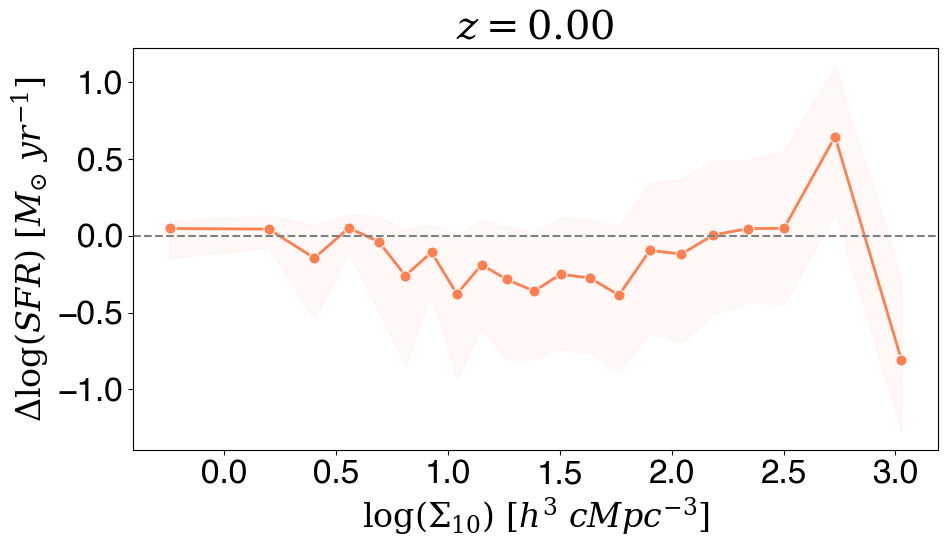

In [75]:
snapshot = 99
sns.lineplot(data=df_results[df_results['SnapNum'] == snapshot],
             x="treatment", 
             y='outcome',
             hue='model',
             hue_order=["Naïve Model"],
             palette=palette,
             estimator='median', 
             errorbar=('pi', 68), 
             err_style='band',
             err_kws={"alpha": 0.05},
             marker='o',
             markersize=8,
             linewidth=2,
             #linestyle='',
             legend=False,
            )

plt.title(f'$z = {redshifts[0]:.2f}$')
plt.axhline(y=0, color='.5', linestyle='--')

plt.xlabel(r'$\log(\Sigma_{10}) \ [h^{3} \ cMpc^{-3}]$')
plt.ylabel(r'$\Delta \log(SFR) \ [M_{\odot} \ yr^{-1}]$')
plt.tight_layout()
#plt.savefig('plots/nature/cdrc_joint_effect_causal_vs_naive_model_residuals.png', dpi=300, bbox_inches='tight')
#plt.savefig('plots/nature/cdrc_joint_effect_causal_vs_naive_model_residuals.svg', dpi=300, bbox_inches='tight')
plt.show()

### Causal vs Traditional Model

In [39]:
df_results = pd.concat([df_results_causal_model_subhalo_mass, df_results_naive_model_stellar_mass])

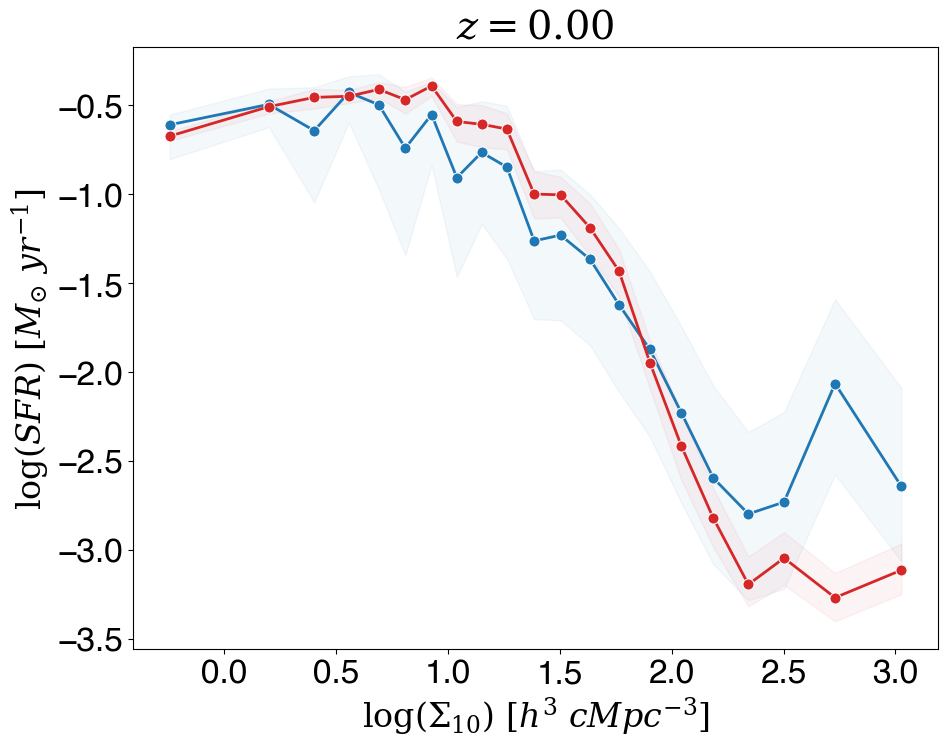

In [40]:
snapshot = 99
sns.lineplot(data=df_results[df_results['SnapNum'] == snapshot],
             x="treatment", 
             y='outcome',
             hue='model',
             hue_order=["Causal Model (Halo Mass)", "Traditional Model (Stellar Mass)"],
             palette=palette,
             estimator='median', 
             errorbar=('pi', 68), 
             err_style='band',
             err_kws={"alpha": 0.05},
             marker='o',
             markersize=8,
             linewidth=2,
             #linestyle='--',
             legend=False,
            )

plt.title(f'$z = {redshifts[0]:.2f}$')
plt.xlabel(r'$\log(\Sigma_{10}) \ [h^{3} \ cMpc^{-3}]$')
plt.ylabel(r'$\log(SFR) \ [M_{\odot} \ yr^{-1}]$')
plt.tight_layout()
#plt.savefig('plots/nature/cdrc_joint_effect_naive_vs_traditional_model.png', dpi=300, bbox_inches='tight')
#plt.savefig('plots/nature/cdrc_joint_effect_naive_vs_traditional_model.svg', dpi=300, bbox_inches='tight')
plt.show()

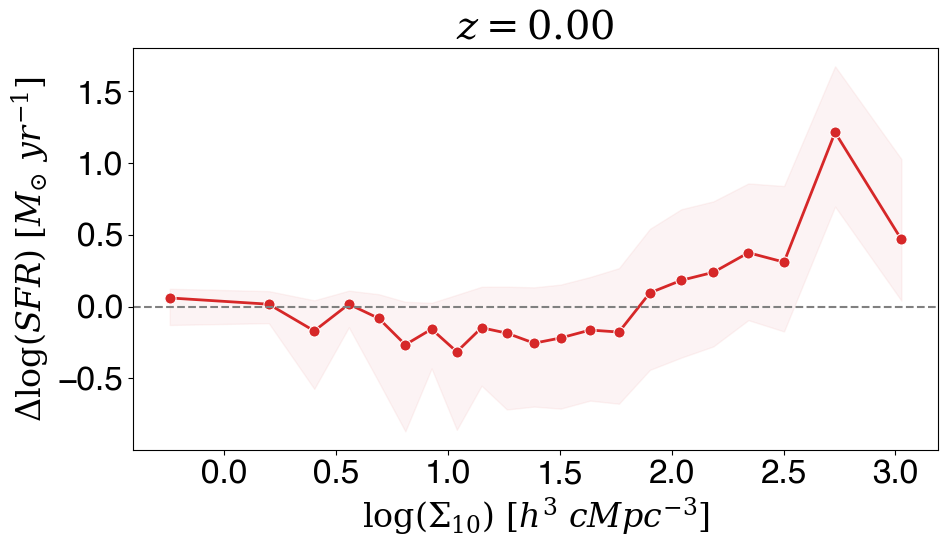

In [77]:
snapshot = 99
sns.lineplot(data=df_results[df_results['SnapNum'] == snapshot],
             x="treatment", 
             y='outcome',
             hue='model',
             hue_order=["Traditional Model (Stellar Mass)"],
             palette=palette,
             estimator='median', 
             errorbar=('pi', 68), 
             err_style='band',
             err_kws={"alpha": 0.05},
             marker='o',
             markersize=8,
             linewidth=2,
             #linestyle='',
             legend=False,
            )

plt.title(f'$z = {redshifts[0]:.2f}$')
plt.axhline(y=0, color='.5', linestyle='--')

plt.xlabel(r'$\log(\Sigma_{10}) \ [h^{3} \ cMpc^{-3}]$')
plt.ylabel(r'$\Delta \log(SFR) \ [M_{\odot} \ yr^{-1}]$')
plt.tight_layout()
#plt.savefig('plots/nature/cdrc_joint_effect_causal_vs_traditional_model_residuals.png', dpi=300, bbox_inches='tight')
#plt.savefig('plots/nature/cdrc_joint_effect_causal_vs_traditional_model_residuals.svg', dpi=300, bbox_inches='tight')
plt.show()

### Naive vs Traditional Model

In [41]:
df_results = pd.concat([df_results_no_model, df_results_naive_model_stellar_mass])

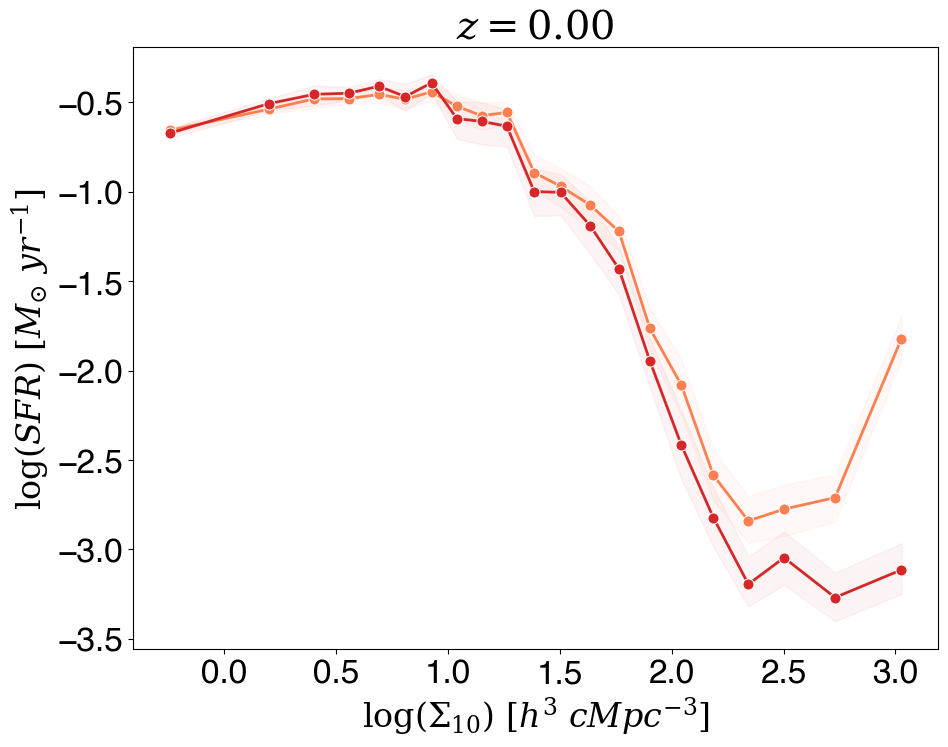

In [42]:
snapshot = 99
sns.lineplot(data=df_results[df_results['SnapNum'] == snapshot],
             x="treatment", 
             y='outcome',
             hue='model',
             hue_order=["Naïve Model", "Traditional Model (Stellar Mass)"],
             palette=palette,
             estimator='median', 
             errorbar=('pi', 68), 
             err_style='band',
             err_kws={"alpha": 0.05},
             marker='o',
             markersize=8,
             linewidth=2,
             #linestyle='--',
             legend=False,
            )

plt.title(f'$z = {redshifts[0]:.2f}$')
plt.xlabel(r'$\log(\Sigma_{10}) \ [h^{3} \ cMpc^{-3}]$')
plt.ylabel(r'$\log(SFR) \ [M_{\odot} \ yr^{-1}]$')
plt.tight_layout()
#plt.savefig('plots/nature/cdrc_joint_effect_naive_vs_traditional_model.png', dpi=300, bbox_inches='tight')
#plt.savefig('plots/nature/cdrc_joint_effect_naive_vs_traditional_model.svg', dpi=300, bbox_inches='tight')
plt.show()

### Causal Model: Halo vs Stellar Mass

In [43]:
df_results = pd.concat([df_results_causal_model_subhalo_mass, df_results_causal_model_stellar_mass])

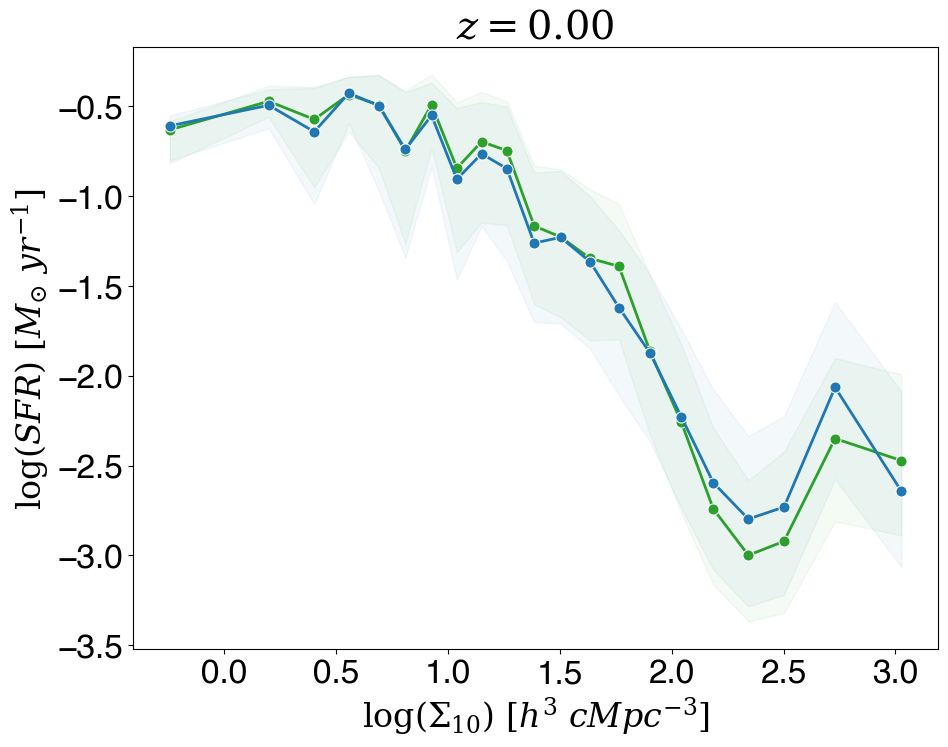

In [44]:
snapshot = 99
sns.lineplot(data=df_results[df_results['SnapNum'] == snapshot],
             x="treatment", 
             y='outcome',
             hue='model',
             hue_order=["Causal Model (Stellar Mass)", "Causal Model (Halo Mass)"],
             palette=palette,
             estimator='median', 
             errorbar=('pi', 68), 
             err_style='band',
             err_kws={"alpha": 0.05},
             marker='o',
             markersize=8,
             linewidth=2,
             #linestyle='--',
             legend=False,
            )

plt.title(f'$z = {redshifts[0]:.2f}$')
plt.xlabel(r'$\log(\Sigma_{10}) \ [h^{3} \ cMpc^{-3}]$')
plt.ylabel(r'$\log(SFR) \ [M_{\odot} \ yr^{-1}]$')
plt.tight_layout()
#plt.savefig('plots/nature/cdrc_joint_effect_halo_vs_stellar_mass.png', dpi=300, bbox_inches='tight')
#plt.savefig('plots/nature/cdrc_joint_effect_halo_vs_stellar_mass.svg', dpi=300, bbox_inches='tight')
plt.show()

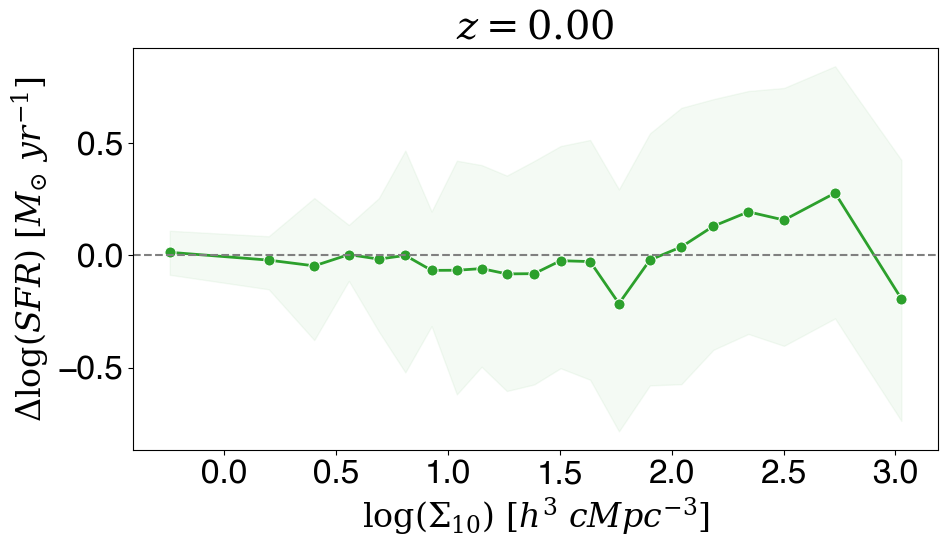

In [79]:
snapshot = 99
sns.lineplot(data=df_results[df_results['SnapNum'] == snapshot],
             x="treatment", 
             y='outcome',
             hue='model',
             hue_order=["Causal Model (Stellar Mass)"],
             palette=palette,
             estimator='median', 
             errorbar=('pi', 68), 
             err_style='band',
             err_kws={"alpha": 0.05},
             marker='o',
             markersize=8,
             linewidth=2,
             #linestyle='',
             legend=False,
            )

plt.title(f'$z = {redshifts[0]:.2f}$')
plt.axhline(y=0, color='.5', linestyle='--')

plt.xlabel(r'$\log(\Sigma_{10}) \ [h^{3} \ cMpc^{-3}]$')
plt.ylabel(r'$\Delta \log(SFR) \ [M_{\odot} \ yr^{-1}]$')
plt.tight_layout()
#plt.savefig('plots/nature/cdrc_joint_effect_halo_vs_stellar_mass_residuals.png', dpi=300, bbox_inches='tight')
#plt.savefig('plots/nature/cdrc_joint_effect_halo_vs_stellar_mass_residuals.svg', dpi=300, bbox_inches='tight')
plt.show()

### Traditional Model

In [52]:
df_results = pd.read_hdf('results/traditional_model/marginal_effect_outcome_current.h5', 'snapshots_all')

In [53]:
df_results

outcome
Levels SnapNum treatment Sample          
0      99      -0.546989 0      -0.575929
                         1      -0.540057
                         2      -0.706551
                         3      -0.520337
                         4       -0.55481
...                                   ...
99     13       2.592449 995    -0.766346
                         996    -0.771498
                         997    -0.931689
                         998    -0.836505
                         999    -0.956431

[231000 rows x 1 columns]

In [54]:
df_results = df_results.reset_index() 

In [55]:
df_results

,Levels,SnapNum,treatment,Sample,outcome
0,0,99,-0.546989,0,-0.575929
1,0,99,-0.546989,1,-0.540057
2,0,99,-0.546989,2,-0.706551
3,0,99,-0.546989,3,-0.520337
4,0,99,-0.546989,4,-0.55481
...,...,...,...,...,...
230995,99,13,2.592449,995,-0.766346
230996,99,13,2.592449,996,-0.771498
230997,99,13,2.592449,997,-0.931689
230998,99,13,2.592449,998,-0.836505


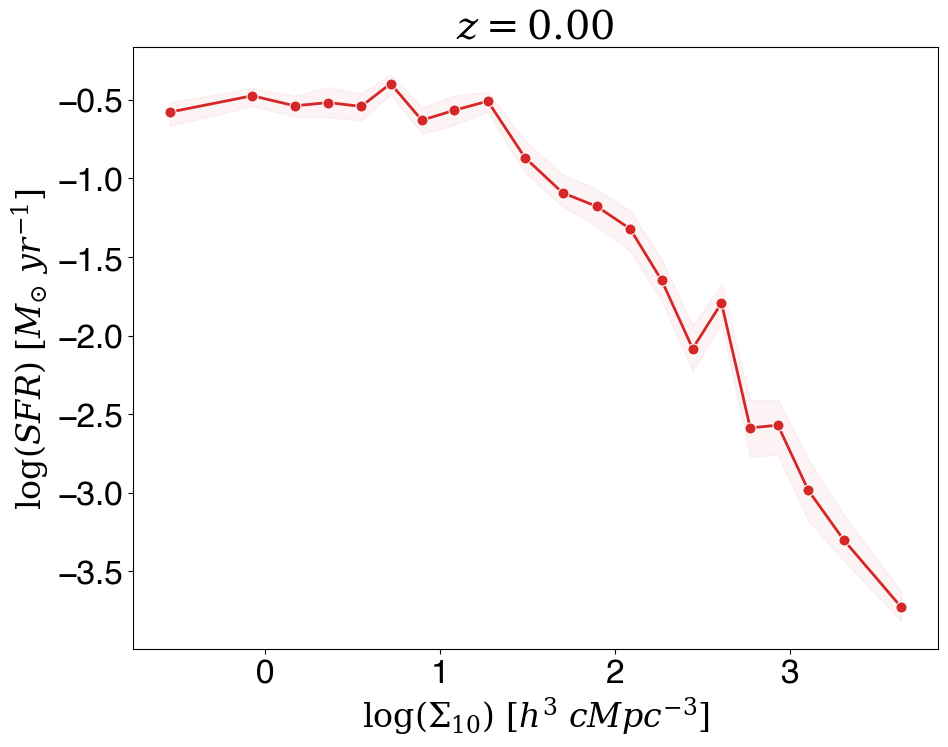

In [56]:
snapshot = 99
sns.lineplot(data=df_results[df_results['SnapNum'] == snapshot], 
             x='treatment', 
             y='outcome', 
             estimator='median', 
             errorbar=('pi', 68), 
             err_style='band',
             err_kws={"alpha": 0.05},
             marker='o',
             markersize=8,
             linewidth=2,
             color=palette_tab10[3]
            )

plt.title(f'$z = {redshifts[0]:.2f}$')
plt.xlabel(r'$\log(\Sigma_{10}) \ [h^{3} \ cMpc^{-3}]$')
plt.ylabel(r'$\log(SFR) \ [M_{\odot} \ yr^{-1}]$')
plt.tight_layout()
#plt.savefig('plots/nature/cdrc_marginal_effect_traditional_model.png', dpi=300, bbox_inches='tight')
#plt.savefig('plots/nature/cdrc_marginal_effect_traditional_model.svg', dpi=300, bbox_inches='tight')
plt.show()

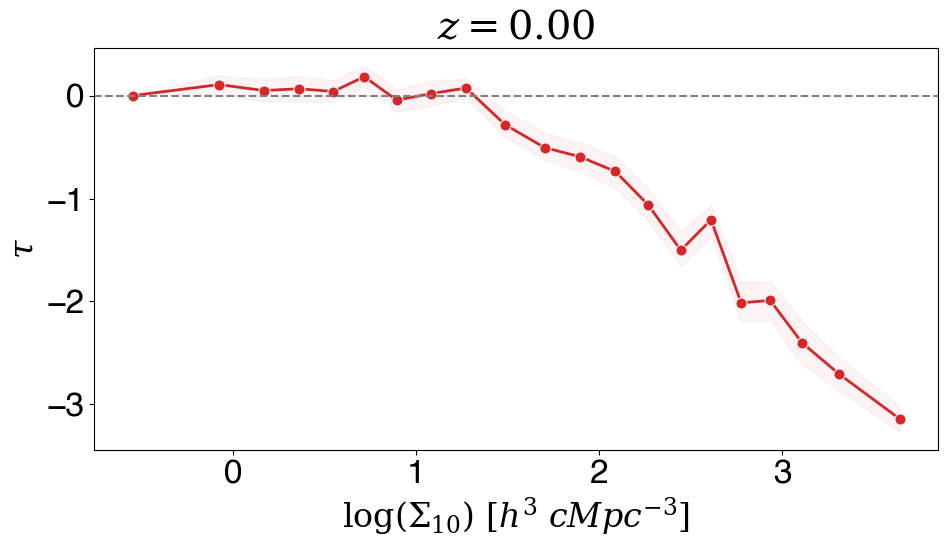

In [69]:
snapshot = 99
sns.lineplot(data=df_results[df_results['SnapNum'] == snapshot],
             x="treatment", 
             y='outcome',
             estimator='median', 
             errorbar=('pi', 68), 
             err_style='band',
             err_kws={"alpha": 0.05},
             marker='o',
             markersize=8,
             linewidth=2,
             color=palette_tab10[3],
            )

plt.title(f'$z = {redshifts[0]:.2f}$')
plt.axhline(y=0, color='.5', linestyle='--')

plt.xlabel(r'$\log(\Sigma_{10}) \ [h^{3} \ cMpc^{-3}]$')
#plt.ylabel(r'$\Delta \log(SFR) \ [M_{\odot} \ yr^{-1}]$') # for matching dimensions
plt.ylabel(r'$\tau$')
plt.tight_layout()
#plt.savefig('plots/nature/cdrc_marginal_effect_causal_effect.png', dpi=300, bbox_inches='tight')
#plt.savefig('plots/nature/cdrc_marginal_effect_causal_effect.svg', dpi=300, bbox_inches='tight')
plt.show()

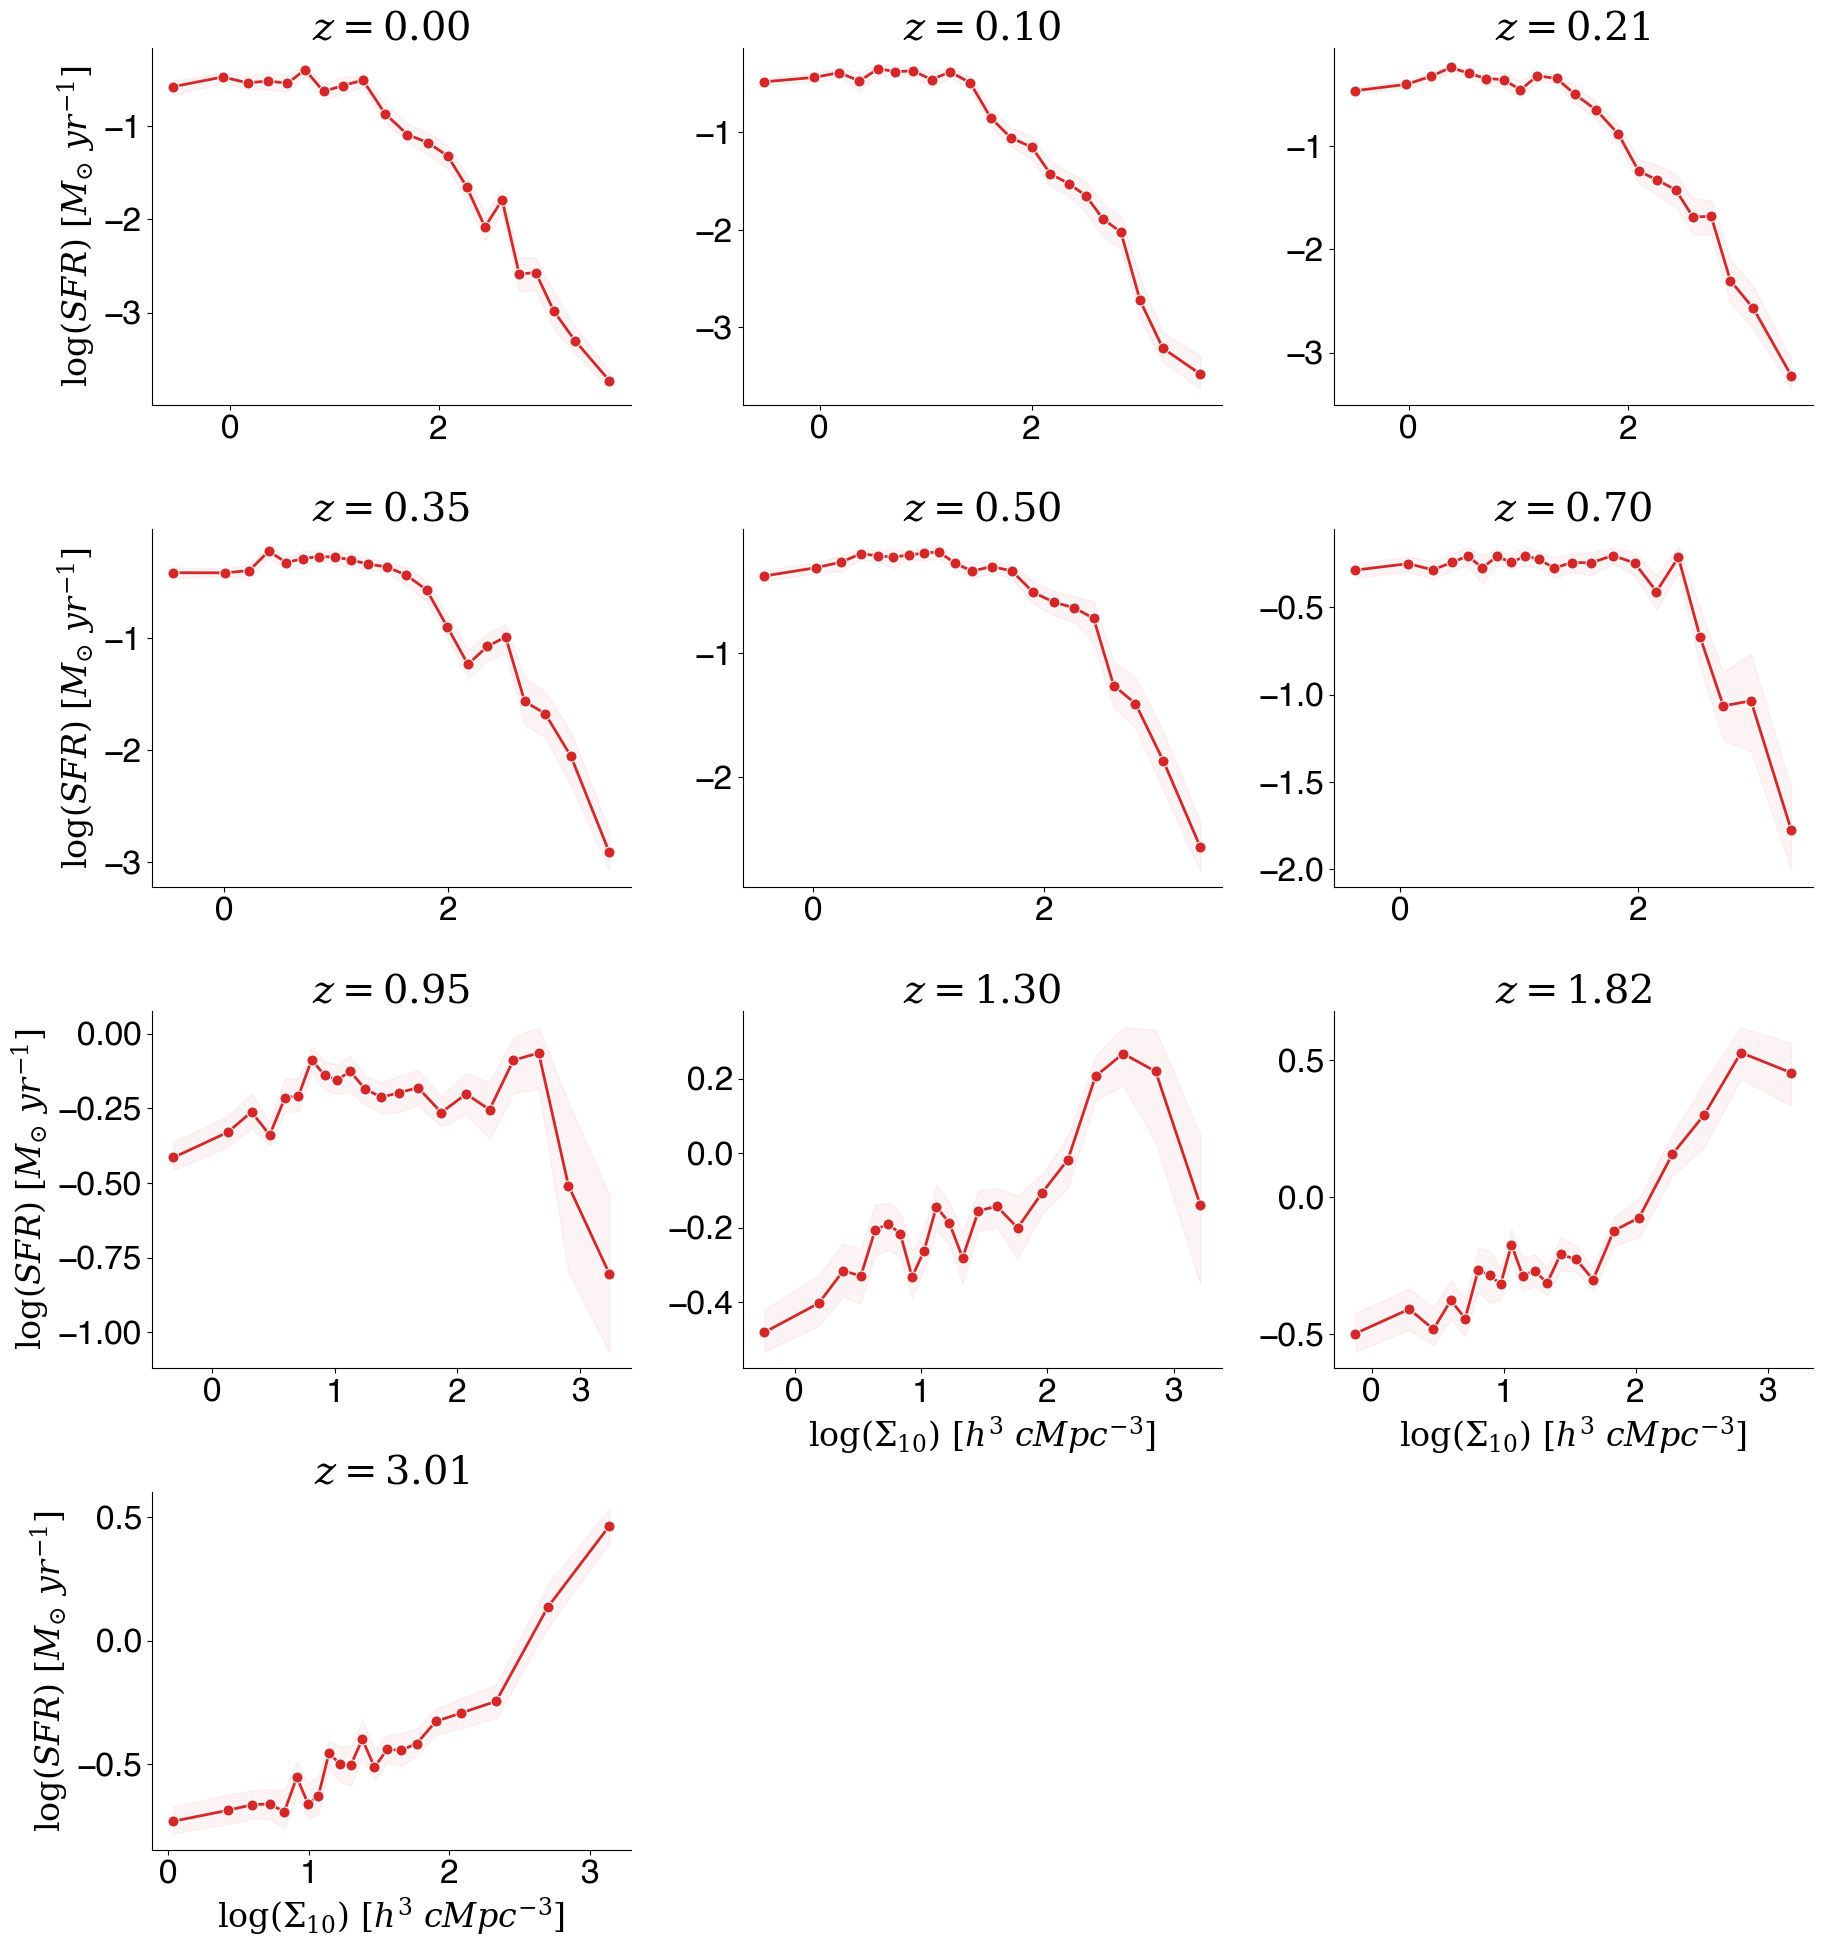

In [57]:
g = sns.FacetGrid(df_results, col="SnapNum", aspect=1.25, height=5, col_wrap=3, col_order=snapshots[:-1], 
                  sharex=False, sharey=False)
g.map_dataframe(sns.lineplot, 
                x="treatment", 
                y='outcome', 
                estimator='median', 
                errorbar=('pi', 68), 
                err_style='band',
                err_kws={"alpha": 0.05},
                marker='o',
                markersize=8,
                linewidth=2,
                color=palette_tab10[3])

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(f'$z = {redshifts[i]:.2f}$')

g.set_xlabels(r'$\log(\Sigma_{10}) \ [h^{3} \ cMpc^{-3}]$')
g.set_ylabels(r'$\log(SFR) \ [M_{\odot} \ yr^{-1}]$')
g.tight_layout()
#plt.savefig('plots/nature/cdrc_marginal_effect_outcome_current_traditional_model.png', dpi=300, bbox_inches='tight')
#plt.savefig('plots/nature/cdrc_marginal_effect_outcome_current_traditional_model.svg', dpi=300, bbox_inches='tight')
plt.show()